# Challenge
Throughout this module, we introduced the amazing and yet challenging domain of unsupervised learning by covering some of the most popular clustering and dimensionality reduction algorithms. Now, it's time for you to apply your unsupervised learning knowledge. In this challenge, you'll work with a dataset of your choice. As always, Kaggle is one of your best friends. You can spend some time on Kaggle and pick a beautiful dataset. Using this dataset:

- Apply dimensionality reduction techniques to visualize the observations.
- Apply clustering techniques to group together similar observations.

# Introduction
- I chose the 2015 Boston Marathon finisher datatest for this unsupervised learning challenge.
- The motivation is to help the organizer figure out how to seperate the participants into proper division, so that the participants can have better marathon running experience. i.e. prepare refreshment for runners at the half way, since not everybody reach at the same time, optimize when and how much refreshment ready for the runners.
- Many times, runner speed is mainly taken into account when seperate them into different divisions, as well as genders and ages. This challenge would study a good way to seperate runners into divisions.

### Load data and data cleaning.

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
# https://www.kaggle.com/pranavbadami/nj-transit-amtrak-nec-performance
df_201904 = pd.read_csv('./nj-transit-amtrak-nec-performance/2019_04.csv')
df_201903 = pd.read_csv('./nj-transit-amtrak-nec-performance/2019_03.csv')
df_201902 = pd.read_csv('./nj-transit-amtrak-nec-performance/2019_02.csv')
df_201901 = pd.read_csv('./nj-transit-amtrak-nec-performance/2019_01.csv')

df_original = pd.concat([df_201904, df_201903, df_201902, df_201901], ignore_index=True )
# df = pd.read_csv('./bostonmarathon-master/results/2013/results.csv')

In [124]:
pd.set_option('display.max_rows', 500) 
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df_original.tail(20)

,date,train_id,stop_sequence,from,from_id,to,to_id,scheduled_time,actual_time,delay_minutes,status,line,type
927724,2019-01-31,0402,18.0,South Orange,140.0,Brick Church,23.0,2019-01-31 06:12:00,2019-01-31 06:14:25,2.416667,departed,Gladstone Branch,NJ Transit
927725,2019-01-31,0402,19.0,Brick Church,23.0,Newark Broad Street,106.0,2019-01-31 06:17:00,2019-01-31 06:20:12,3.200000,departed,Gladstone Branch,NJ Transit
927726,2019-01-31,0402,20.0,Newark Broad Street,106.0,Hoboken,63.0,2019-01-31 06:33:00,2019-01-31 06:32:00,0.000000,estimated,Gladstone Branch,NJ Transit
927727,2019-01-31,0066,1.0,Middletown NY,86.0,Middletown NY,86.0,2019-01-31 15:19:00,2019-01-31 15:19:37,0.616667,departed,Bergen Co. Line,NJ Transit
927728,2019-01-31,0066,2.0,Middletown NY,86.0,Campbell Hall,26.0,2019-01-31 15:26:00,2019-01-31 15:29:40,3.666667,departed,Bergen Co. Line,NJ Transit
927729,2019-01-31,0066,3.0,Campbell Hall,26.0,Salisbury Mills-Cornwall,135.0,2019-01-31 15:39:00,2019-01-31 15:42:07,3.116667,departed,Bergen Co. Line,NJ Transit
927730,2019-01-31,0066,4.0,Salisbury Mills-Cornwall,135.0,Harriman,57.0,2019-01-31 15:56:00,2019-01-31 16:01:11,5.183333,departed,Bergen Co. Line,NJ Transit
927731,2019-01-31,0066,5.0,Harriman,57.0,Tuxedo,149.0,2019-01-31 16:06:00,2019-01-31 16:12:15,6.250000,departed,Bergen Co. Line,NJ Transit
927732,2019-01-31,0066,6.0,Tuxedo,149.0,Sloatsburg,137.0,2019-01-31 16:12:00,2019-01-31 16:16:14,4.233333,departed,Bergen Co. Line,NJ Transit
927733,2019-01-31,0066,7.0,Sloatsburg,137.0,Suffern,144.0,2019-01-31 16:19:00,2019-01-31 16:23:07,4.116667,departed,Bergen Co. Line,NJ Transit


In [125]:
df_copy = df_original.copy()

In [126]:
# use a small size sample to test
# df_original = df_original.sample(n=50000, random_state=1)

### As the title indicated, we are focus on "NJ transit type"

In [127]:
df_original[df_original.type=='NJ Transit'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878492 entries, 0 to 927739
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            878492 non-null  object 
 1   train_id        878492 non-null  object 
 2   stop_sequence   829278 non-null  float64
 3   from            878492 non-null  object 
 4   from_id         878490 non-null  float64
 5   to              878492 non-null  object 
 6   to_id           878490 non-null  float64
 7   scheduled_time  829278 non-null  object 
 8   actual_time     878492 non-null  object 
 9   delay_minutes   829278 non-null  float64
 10  status          878492 non-null  object 
 11  line            878492 non-null  object 
 12  type            878492 non-null  object 
dtypes: float64(4), object(9)
memory usage: 93.8+ MB


### "delay_minutes" and "scheduled_time" are probabely the most import features, imputation doesn't make much sense. So better drop such rows with null.

In [129]:
df = df_original[df_original.type=='NJ Transit'][df_original.scheduled_time.notna()]
df.info()

C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 829278 entries, 0 to 927739
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            829278 non-null  object 
 1   train_id        829278 non-null  object 
 2   stop_sequence   829278 non-null  float64
 3   from            829278 non-null  object 
 4   from_id         829276 non-null  float64
 5   to              829278 non-null  object 
 6   to_id           829278 non-null  float64
 7   scheduled_time  829278 non-null  object 
 8   actual_time     829278 non-null  object 
 9   delay_minutes   829278 non-null  float64
 10  status          829278 non-null  object 
 11  line            829278 non-null  object 
 12  type            829278 non-null  object 
dtypes: float64(4), object(9)
memory usage: 88.6+ MB


### Converting the "scheduled_time" and "actual_time" columns to datetimes

In [130]:
df['scheduled_time'] = pd.to_datetime(df['scheduled_time']) 
df['actual_time'] = pd.to_datetime(df['actual_time'])
df['date'] = pd.to_datetime(df['date'])
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 829278 entries, 0 to 927739
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            829278 non-null  datetime64[ns]
 1   train_id        829278 non-null  object        
 2   stop_sequence   829278 non-null  float64       
 3   from            829278 non-null  object        
 4   from_id         829276 non-null  float64       
 5   to              829278 non-null  object        
 6   to_id           829278 non-null  float64       
 7   scheduled_time  829278 non-null  datetime64[ns]
 8   actual_time     829278 non-null  datetime64[ns]
 9   delay_minutes   829278 non-null  float64       
 10  status          829278 non-null  object        
 11  line            829278 non-null  object        
 12  type            829278 non-null  object        
dtypes: datetime64[ns](3), float64(4), object(6)
memory usage: 88.6+ MB


,date,train_id,stop_sequence,from,from_id,to,to_id,scheduled_time,actual_time,delay_minutes,status,line,type
0,2019-04-01,4393,1.0,Long Branch,74.0,Long Branch,74.0,2019-04-02 00:08:00,2019-04-02 00:07:06,0.000000,departed,No Jersey Coast,NJ Transit
1,2019-04-01,4393,2.0,Long Branch,74.0,Elberon,40.0,2019-04-02 00:12:00,2019-04-02 00:13:09,1.150000,departed,No Jersey Coast,NJ Transit
2,2019-04-01,4393,3.0,Elberon,40.0,Allenhurst,4.0,2019-04-02 00:16:00,2019-04-02 00:18:07,2.116667,departed,No Jersey Coast,NJ Transit
3,2019-04-01,4393,4.0,Allenhurst,4.0,Asbury Park,8.0,2019-04-02 00:20:00,2019-04-02 00:21:12,1.200000,departed,No Jersey Coast,NJ Transit
4,2019-04-01,4393,5.0,Asbury Park,8.0,Bradley Beach,22.0,2019-04-02 00:23:00,2019-04-02 00:23:10,0.166667,departed,No Jersey Coast,NJ Transit
5,2019-04-01,4393,6.0,Bradley Beach,22.0,Belmar,15.0,2019-04-02 00:27:00,2019-04-02 00:27:04,0.066667,departed,No Jersey Coast,NJ Transit
6,2019-04-01,4393,7.0,Belmar,15.0,Spring Lake,141.0,2019-04-02 00:31:00,2019-04-02 00:31:07,0.116667,departed,No Jersey Coast,NJ Transit
7,2019-04-01,4393,8.0,Spring Lake,141.0,Manasquan,79.0,2019-04-02 00:35:00,2019-04-02 00:34:06,0.000000,departed,No Jersey Coast,NJ Transit
8,2019-04-01,4393,9.0,Manasquan,79.0,Point Pleasant Beach,122.0,2019-04-02 00:40:00,2019-04-02 00:40:05,0.083333,departed,No Jersey Coast,NJ Transit
9,2019-04-01,4393,10.0,Point Pleasant Beach,122.0,Bay Head,13.0,2019-04-02 00:49:00,2019-04-02 00:48:00,0.000000,estimated,No Jersey Coast,NJ Transit


#### creat new feauture "day_of_weeks"

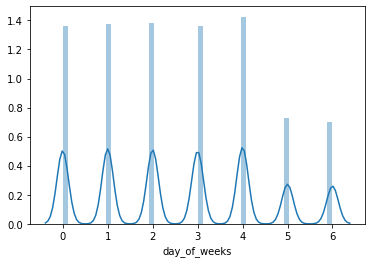

In [131]:
df['day_of_weeks'] = df['date'].dt.dayofweek
# df.info()
sns.distplot(df['day_of_weeks'])

In [132]:
# Parse the actual day_time to seperate features.
df['actual_time_month'] = df['actual_time'].dt.month
df['actual_time_day'] = df['actual_time'].dt.day

df['actual_time_hour'] = df['actual_time'].dt.hour
df['actual_time_min'] = df['actual_time'].dt.minute
df['actual_time_sec'] = df['actual_time'].dt.second

df['actual_time_ofweek'] = df['actual_time'].dt.dayofweek

# sns.distplot(df['actual_time_min'])

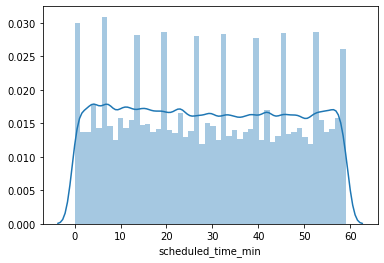

In [133]:
# Parse the actual day_time to seperate features.
df['scheduled_time_month'] = df['scheduled_time'].dt.month
df['scheduled_time_day'] = df['scheduled_time'].dt.day

df['scheduled_time_hour'] = df['scheduled_time'].dt.hour
df['scheduled_time_min'] = df['scheduled_time'].dt.minute
df['scheduled_time_sec'] = df['scheduled_time'].dt.second

df['scheduled_time_ofweek'] = df['scheduled_time'].dt.dayofweek

sns.distplot(df['scheduled_time_min'])

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 829278 entries, 0 to 927739
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   date                   829278 non-null  datetime64[ns]
 1   train_id               829278 non-null  object        
 2   stop_sequence          829278 non-null  float64       
 3   from                   829278 non-null  object        
 4   from_id                829276 non-null  float64       
 5   to                     829278 non-null  object        
 6   to_id                  829278 non-null  float64       
 7   scheduled_time         829278 non-null  datetime64[ns]
 8   actual_time            829278 non-null  datetime64[ns]
 9   delay_minutes          829278 non-null  float64       
 10  status                 829278 non-null  object        
 11  line                   829278 non-null  object        
 12  type                   829278 non-null  obje

In [135]:
df_cluster = df[['train_id', 'stop_sequence', 'from',  'to', 'delay_minutes', 'status', 'line', 
#                  'actual_time_min', 'actual_time_month', 'actual_time_day', 'actual_time_hour', 'actual_time_sec', 'actual_time_ofweek', 
                 'scheduled_time_month', 'scheduled_time_day', 'scheduled_time_hour', 'scheduled_time_min', #'scheduled_time_sec', 
                 'scheduled_time_ofweek']]

In [137]:
df_cluster = df_cluster.drop('delay_minutes', axis=1)
df_cluster = df_cluster.drop('train_id', axis=1)
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 829278 entries, 0 to 927739
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   stop_sequence          829278 non-null  float64
 1   from                   829278 non-null  object 
 2   to                     829278 non-null  object 
 3   status                 829278 non-null  object 
 4   line                   829278 non-null  object 
 5   scheduled_time_month   829278 non-null  int64  
 6   scheduled_time_day     829278 non-null  int64  
 7   scheduled_time_hour    829278 non-null  int64  
 8   scheduled_time_min     829278 non-null  int64  
 9   scheduled_time_ofweek  829278 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 69.6+ MB


In [138]:
for col in df_cluster.columns:
    print(col, df_cluster[col].nunique())

stop_sequence 26
from 157
to 156
status 3
line 10
scheduled_time_month 5
scheduled_time_day 31
scheduled_time_hour 24
scheduled_time_min 60
scheduled_time_ofweek 7


In [139]:
df_dummy = pd.get_dummies(df_cluster, drop_first=True)
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 829278 entries, 0 to 927739
Columns: 328 entries, stop_sequence to line_Raritan Valley
dtypes: float64(1), int64(5), uint8(322)
memory usage: 298.9 MB


In [140]:
df_cluster_new = pd.concat([df_dummy, df['delay_minutes']], axis=1)
df_cluster_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 829278 entries, 0 to 927739
Columns: 329 entries, stop_sequence to delay_minutes
dtypes: float64(2), int64(5), uint8(322)
memory usage: 305.3 MB


# Dimenionality reduction
- When the dimenionality is high, even there are not many rows, the calculation is super slow. And the problem is not necessary from clustering but from evaluation like silhouette score. 
- Also when dimenion is low, it is easier for visually evaluate the clustering result.
- But if we are okay with EDA-style evaluation, i.e. check features within each cluster, then skipping dimensionality reduction is fine (in this case, it seems dimenionality reduction would not help too much).

### too many features, use PCA for dimensionality reduction

In [141]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_std = scaler.fit_transform(df_cluster_new)



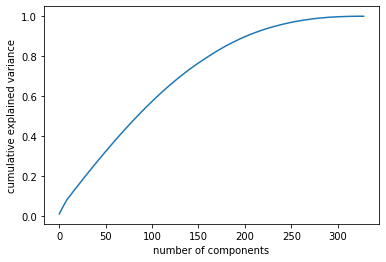

In [143]:
pca = PCA()
# pca.fit(X_train_select_quantrans)
pca.fit(X_std)

# plot
explained_variance = pca.explained_variance_ratio_
explained_variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

df_pca = pd.DataFrame(np.cumsum(pca.explained_variance_ratio_))

In [144]:
df_pca

,0
0,0.009623
1,0.018846
2,0.027981
3,0.036888
4,0.045737
5,0.054378
6,0.062902
7,0.071228
8,0.079219
9,0.085394


In [147]:
# set pca select threshold
index = next(idx for idx, value in enumerate(df_pca.values) if value > 0.7)
if index > 30:
    pca_select = 30
else: 
    pca_select = index

pca = PCA(n_components=pca_select)

# X_train_4 = pd.concat([pd.DataFrame(pca.fit_transform(X_train_select_quantrans)),df_X_train_dummpy],axis=1)
# X_test_4 = pd.concat([pd.DataFrame(pca.fit_transform(X_test_select_quantrans)),df_X_test_dummpy],axis=1)
X_pca = pd.DataFrame(pca.fit_transform(X_std))


In [148]:
X_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,2.258954,-0.852436,-0.453293,-0.617694,-0.001386,-0.151949,-4.407820,0.025057,0.566512,0.757637,-0.151493,-0.069394,-1.323468,-2.838466,3.432883,0.135704,1.391331,-1.369823,-0.107338,1.100972,-0.005486,1.282980,-0.160947,-0.666712,0.775919,0.134246,0.831547,0.533329,-0.072173,1.241674
1,2.145467,-0.759335,-0.371807,-0.192399,-0.936840,-1.190522,-4.370054,0.229032,0.753168,0.721992,0.233013,-1.301248,-1.810328,-2.564884,2.160031,0.861722,2.086004,-1.987941,0.498473,0.387829,1.099511,0.687427,0.555439,-0.874007,-0.348494,-0.599225,1.075145,0.350071,0.286964,1.319393
2,2.051256,-0.847196,-0.468211,-0.734657,-0.028952,-0.111716,-4.383805,-0.112474,0.265862,-0.787391,-0.160287,1.596081,0.948702,-1.327082,3.116796,-2.005559,-2.103797,-0.322461,-0.749018,-0.223094,-0.101630,2.469230,1.560962,0.995728,2.450648,0.859440,-0.982628,1.482956,-4.549566,3.024858
3,1.960651,-0.689476,-0.372204,-0.051619,-1.127644,-1.785853,-4.479759,0.358920,0.546683,-0.123017,0.647624,-4.110063,-2.383176,-0.522620,-2.211770,2.086062,3.232395,-3.044308,0.161165,-2.655922,3.192909,0.675933,2.088107,0.231420,-2.186576,-0.224728,-0.211291,-0.620324,1.641384,0.538749
4,1.908196,-0.840659,-0.461420,-0.454418,-1.029678,-0.961968,-4.287404,-0.048970,0.432257,-1.306337,-0.464783,0.689731,1.638889,1.712082,4.780449,-3.074940,-5.057845,-0.116923,-1.888082,-0.914730,1.773947,2.538923,2.704474,3.079326,0.963649,0.666291,-0.123234,0.666811,-3.134605,1.121884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829273,-0.233802,0.614261,-0.354926,-0.164610,0.986996,-1.950314,0.407077,-0.032815,0.052830,-0.299658,-0.006378,0.506196,1.795529,-0.359008,0.141880,1.488773,-0.680741,-0.009185,-1.716849,0.718652,-0.282244,1.068629,-0.159834,0.652386,0.696241,-0.728931,1.703698,-0.927569,0.091353,-0.241128
829274,-0.290865,0.457223,-0.199887,-0.009239,0.278295,-1.510961,0.182485,-0.060221,0.269769,-0.322237,0.312734,-0.177921,2.005728,0.620859,1.716314,-1.402076,-0.166004,0.497443,1.261838,-0.598671,-0.710876,-0.518485,-0.587225,0.550660,-0.661631,-0.138848,-0.314028,0.944311,0.825604,-1.224535
829275,-0.203044,0.334709,-0.158985,-0.058325,0.080067,-0.566602,0.044068,0.007323,0.008212,-1.737550,-0.381289,0.874886,2.118727,2.374966,1.281198,-0.291403,0.882005,-1.520214,2.348117,-2.422734,1.393799,-0.352093,0.252206,-0.611854,1.531236,1.143946,-0.529350,-0.113949,0.989770,-0.533361
829276,-0.369804,0.631549,-0.554209,0.084391,0.068763,-0.767560,0.222634,0.066051,0.069856,-2.371003,-0.059842,0.323652,0.494526,1.367340,0.543166,-0.791514,1.381516,-2.267931,0.907906,0.530530,1.134973,0.749015,0.758068,-0.498911,-0.176797,-0.507559,-0.959752,-0.350935,0.215172,0.973132


### looks like PCA would not reduce dimenionality effectively

### Try T-SNE

In [67]:
# from sklearn.manifold import TSNE

# # time_start = time.time()
# tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300, n_jobs=-1)
# tsne_results = tsne.fit_transform(X_std)

In [68]:
# plt.figure(figsize=(10,5))
# plt.scatter(tsne_results[:, 0], tsne_results[:, 1], alpha=0.1)
# plt.xticks([])
# plt.yticks([])
# plt.axis('off')
# plt.show()

# Try K-Means

In [150]:
# x_cluster = np.array(X_pca)
x_cluster = X_std

In [ ]:
# cluster = 2, silhouette = 0.20652759628173734
# cluster = 3, silhouette = 0.06285536495843576
# cluster = 4, silhouette = 0.10470883022829058
# cluster = 5, silhouette = 0.06833987482446502
# cluster = 6, silhouette = 0.11825278868777149
# cluster = 7, silhouette = 0.1334303680345967
# cluster = 8, silhouette = 0.12921666412730223

In [151]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Defining the k-means
silhouettes = []
mapping0 = {}
# for n_cluster in [2,3,4,5,6,7, 8]:
for n_cluster in [3]:
    kmeans_cluster = KMeans(n_clusters=n_cluster, random_state=123, verbose=1, n_jobs=-1)

    # Fit model
    kmeans_cluster.fit(x_cluster)
    y_pred = kmeans_cluster.predict(x_cluster)
    
#     sil_score = silhouette_score(x_cluster, y_pred, metric='euclidean')
#     silhouettes.append(sil_score)
#     mapping0[n_cluster] = sil_score

#     print("cluster = {}, silhouette = {}".format(n_cluster, sil_score))

### choose cluster = 3 or cluster = 4 or  cluster =6 to start some analysis
- using silhouette score to check is very slow, also it only indicate the performance of globular cluster (globe-like shape), so we might as well need to check each features to evaluate the performance of non-linear clustering .

In [160]:
# add new features
# df_result = pd.concat([df, pd.DataFrame({'4_cluster': y_pred_4_cluster, '6_cluster': y_pred_6_cluster})], axis=1, ignore_index=True)
df_result = df.copy()

df_result['y_pred_3_cluster'] = y_pred
# df_result['y_pred_4_cluster'] = y_pred_4_cluster
# df_result['y_pred_6_cluster'] = y_pred_6_cluster

# df['schedule_time_of_day'] = df['scheduled_time_hour'].apply(lambda x: 'early moring' if x in [0,1,2,3,4,5] 
#                                                                         'late moring' if x in [0,1,2,3,4,5]
#                                                             else 'other')

for time_day in range(0,6):
    df_result.loc[df_result['scheduled_time_hour'] == time_day, 'schedule_time_of_day'] = 'early moring' 
for time_day in range(6,12):
    df_result.loc[df_result['scheduled_time_hour'] == time_day, 'schedule_time_of_day'] = 'late moring' 
for time_day in range(12,18):
    df_result.loc[df_result['scheduled_time_hour'] == time_day, 'schedule_time_of_day'] = 'afternoon' 
for time_day in range(18,24):
    df_result.loc[df_result['scheduled_time_hour'] == time_day, 'schedule_time_of_day'] = 'evening' 


# df_result

## pdf for delay_min

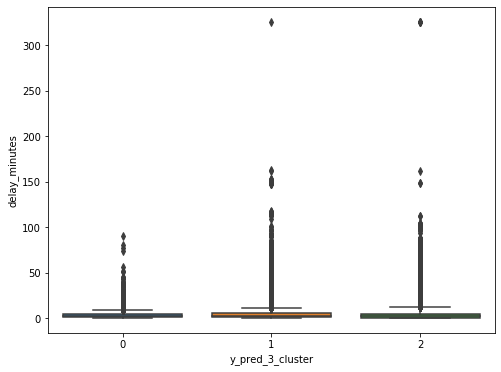

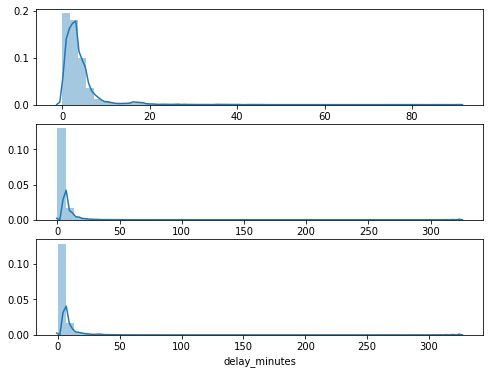

In [156]:
# sns.distplot(x='delay_minutes', hue=)
plt.figure(figsize=(8,6))
sns.boxplot(y='delay_minutes', x='y_pred_3_cluster', data=df_result)
plt.show()

plt.figure(figsize=(8,6))
for i in range(3):
    plt.subplot(3,1,i+1)
    sns.distplot(df_result[df_result.y_pred_3_cluster==i]['delay_minutes'])
plt.show()

### It seems like there is not much different in the delay across the clusters.

## check day-of-week

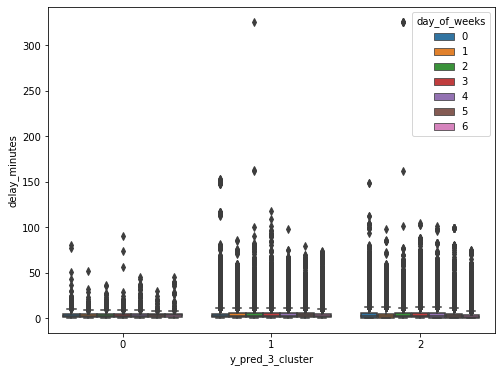

In [158]:
plt.figure(figsize=(8,6))
# sns.countplot(x='day_of_weeks', hue='y_pred_4_cluster', data=df_result)
sns.boxplot(y='delay_minutes', x='y_pred_3_cluster', hue='day_of_weeks', data=df_result)

In [ ]:
## check day-of-week

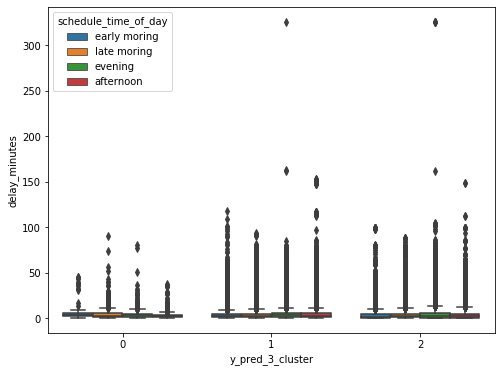

In [159]:
plt.figure(figsize=(8,6))
# sns.countplot(x='day_of_weeks', hue='y_pred_4_cluster', data=df_result)
sns.boxplot(y='delay_minutes', x='y_pred_3_cluster', hue='schedule_time_of_day', data=df_result)